In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#change start
batch_size = 16
#change end 

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#another change num_workers=0
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


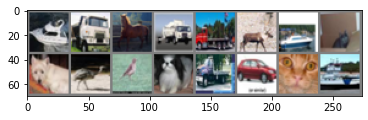

 ship truck horse truck truck  deer  ship   cat   dog  bird  bird   dog truck   car   cat  ship


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #layer changes 
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32, 64, 5,padding=1)
        self.conv4 = nn.Conv2d(64, 128, 5,padding=1)
        self.fc1 = nn.Linear(128*36 , 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, 34)
        self.fc5 = nn.Linear(34, 10)

    def forward(self, x):
      #forward method change according to layers
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)),(2,2))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
       
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
net = Net()

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#chnage optim.Adam and moment removed 
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
#change epoch(10)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.729
[2,  2000] loss: 1.165
[3,  2000] loss: 0.959
[4,  2000] loss: 0.821
[5,  2000] loss: 0.718
[6,  2000] loss: 0.626
[7,  2000] loss: 0.555
[8,  2000] loss: 0.487
[9,  2000] loss: 0.425
[10,  2000] loss: 0.375
Finished Training


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

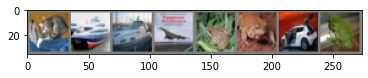

GroundTruth:    cat


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
outputs = net(images)

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:    cat


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
correct = 0
total = 0
#added bellow variable to store final accuracy of this model
model1acc=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
model1acc=100 * correct / total
print('Accuracy of the network on the 10000 test images: %d %%' % (
    model1acc))

Accuracy of the network on the 10000 test images: 71 %


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
#added this varaible to show accuracy in chart for each classes
chartarr1=[]
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    chartarr1.append(accuracy)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 73.0 %
Accuracy for class car   is: 80.0 %
Accuracy for class bird  is: 63.7 %
Accuracy for class cat   is: 56.5 %
Accuracy for class deer  is: 64.3 %
Accuracy for class dog   is: 53.9 %
Accuracy for class frog  is: 76.4 %
Accuracy for class horse is: 80.8 %
Accuracy for class ship  is: 83.8 %
Accuracy for class truck is: 85.7 %


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.nn as nn
import torch.nn.functional as F


class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.151
[1,  4000] loss: 1.820
[1,  6000] loss: 1.712
[1,  8000] loss: 1.621
[1, 10000] loss: 1.553
[1, 12000] loss: 1.489
[2,  2000] loss: 1.420
[2,  4000] loss: 1.396
[2,  6000] loss: 1.349
[2,  8000] loss: 1.343
[2, 10000] loss: 1.343
[2, 12000] loss: 1.288
Finished Training


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
correct = 0
total = 0
model2acc=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
model2acc=100 * correct / total
print('Accuracy of the network on the 10000 test images: %d %%' % (
    model2acc))

Accuracy of the network on the 10000 test images: 52 %


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
chartarr2=[]
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    chartarr2.append(accuracy)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 66.7 %
Accuracy for class car   is: 69.2 %
Accuracy for class bird  is: 41.1 %
Accuracy for class cat   is: 28.9 %
Accuracy for class deer  is: 36.7 %
Accuracy for class dog   is: 42.8 %
Accuracy for class frog  is: 75.1 %
Accuracy for class horse is: 47.0 %
Accuracy for class ship  is: 70.3 %
Accuracy for class truck is: 51.6 %


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#updated batch size
batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2()

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#updated optimizer 
optimizer = optim.Adam(net2.parameters(), lr=0.001)

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
#updated epoch
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.741
[1,  4000] loss: 1.472
[1,  6000] loss: 1.388
[2,  2000] loss: 1.278
[2,  4000] loss: 1.250
[2,  6000] loss: 1.223
[3,  2000] loss: 1.150
[3,  4000] loss: 1.141
[3,  6000] loss: 1.132
[4,  2000] loss: 1.075
[4,  4000] loss: 1.073
[4,  6000] loss: 1.070
[5,  2000] loss: 1.016
[5,  4000] loss: 1.015
[5,  6000] loss: 1.028
[6,  2000] loss: 0.972
[6,  4000] loss: 0.978
[6,  6000] loss: 0.975
[7,  2000] loss: 0.923
[7,  4000] loss: 0.923
[7,  6000] loss: 0.954
[8,  2000] loss: 0.874
[8,  4000] loss: 0.910
[8,  6000] loss: 0.918
[9,  2000] loss: 0.845
[9,  4000] loss: 0.873
[9,  6000] loss: 0.888
[10,  2000] loss: 0.814
[10,  4000] loss: 0.845
[10,  6000] loss: 0.872
Finished Training


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
correct = 0
total = 0
model3acc=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
model3acc=100 * correct / total
print('Accuracy of the network on the 10000 test images: %d %%' % (
    model3acc))

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
chartarr3=[]
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    chartarr3.append(accuracy)
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 54.7 %
Accuracy for class car   is: 77.1 %
Accuracy for class bird  is: 47.3 %
Accuracy for class cat   is: 39.0 %
Accuracy for class deer  is: 53.6 %
Accuracy for class dog   is: 60.9 %
Accuracy for class frog  is: 73.2 %
Accuracy for class horse is: 66.1 %
Accuracy for class ship  is: 71.6 %
Accuracy for class truck is: 66.0 %


('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


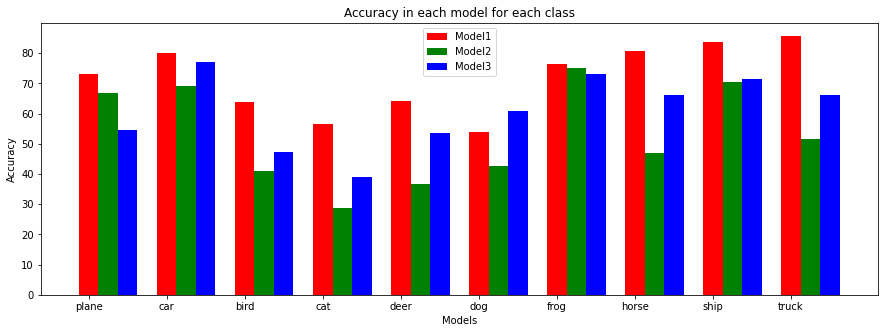

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
#https://www.python-graph-gallery.com/barplot/
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
width = 0.25
y_pos = np.arange(len(classes))
print(classes)
# Create bars
#plt.bar(y_pos, chartarr1)
plt.bar(y_pos , chartarr1, 0.25, label = 'Model1' , color = 'r')
plt.bar(y_pos + width, chartarr2, 0.25, label = 'Model2' , color = 'g')
plt.bar(y_pos + width*2, chartarr3, 0.25, label = 'Model3' , color = 'b')

# Create names on the x-axis
plt.xticks(y_pos, classes)
#plt.xticks(X_axis, X)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy in each model for each class")
plt.legend()

# Show graphic
plt.show()

No handles with labels found to put in legend.


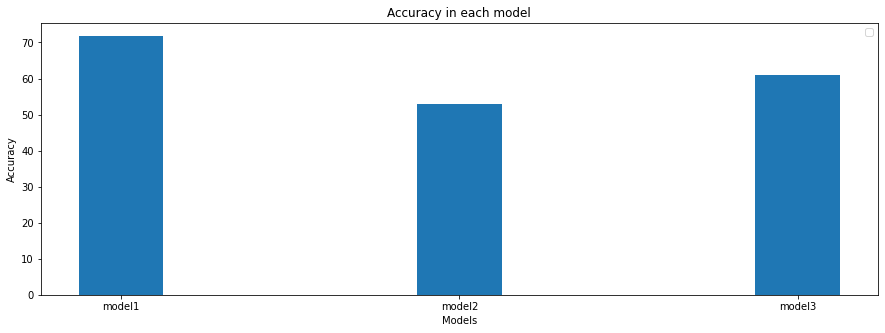

In [ ]:
#ref https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
#https://www.python-graph-gallery.com/barplot/
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
width = 0.25
models=['model1','model2','model3']
acclist=[]
acclist.append(model1acc)
acclist.append(model2acc)
acclist.append(model3acc)
y_pos = np.arange(len(models))

plt.bar(y_pos , acclist, 0.25)

# Create names on the x-axis
plt.xticks(y_pos, models)
#plt.xticks(X_axis, X)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy in each model")
plt.legend()

# Show graphic
plt.show()